In [1]:
import cv2
from matplotlib import pyplot as plt
from random import random
import cairo
import numpy as np
import math
%matplotlib inline
import time
from sklearn.cluster import MeanShift, estimate_bandwidth
from PIL import Image

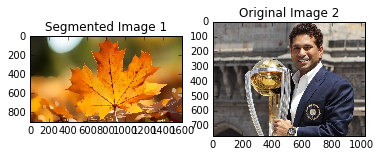

In [3]:
Image1 = cv2.imread('leaf-seg_20_13.png')
Image1 = cv2.cvtColor(Image1, cv2.COLOR_BGR2RGB)
plt.subplot(121)
plt.imshow(Image1)
plt.title('Segmented Image 1')
plt.subplot(122)
Image2 = cv2.imread('sachin.jpg')
Image2 = cv2.cvtColor(Image2, cv2.COLOR_BGR2RGB)
plt.imshow(Image2)
plt.title('Original Image 2')
plt.show()

## Image Segmentation

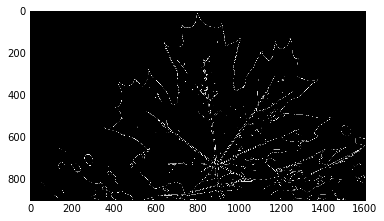

In [4]:
segmented = Image1
canny = cv2.Canny(Image1,200,300)
plt.imshow(canny,cmap='gray')
plt.show()

In [5]:
edges_inv = (255 - canny)

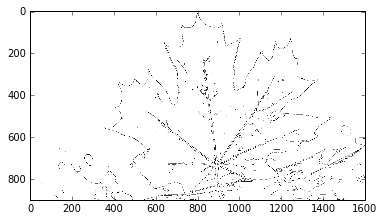

In [6]:
plt.imshow(edges_inv,cmap='gray')
plt.show()

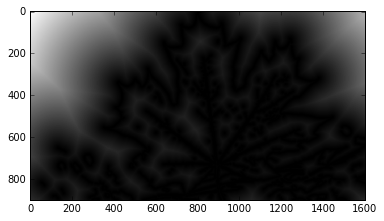

In [7]:
dist_transform = cv2.distanceTransform(edges_inv,cv2.DIST_L2,0) 
plt.imshow(dist_transform,cmap='gray')

In [8]:
img  = segmented

In [10]:
SIZE_X = img.shape[1]
SIZE_Y = img.shape[0]
SIZE = min(SIZE_X,SIZE_Y)

LINEWIDTH = 0.1

TWOPI = 2.0*3.14
BACK = [0,0,0,1]

## Functions for creating circles

In [11]:
def add_new_circles(circles,r,t):
    for x in range(2*r,SIZE_X- r):
        for y in range(2*r,SIZE_Y - r):
            a=True
            if dist_transform[y,x]>t:
                if is_fill[x,y]==0:
                    for rt in range(x-r,x+r+1):
                        yu=rt-x
                        for ty in range(y-r,y+r+1):
                            op=ty-y
                            if yu*yu+op*op<(r+1)*(r+1):
                                if is_fill[rt,ty]==1:
                                    a=False
                                    break
                            if a==False:
                                break
                    
                    if a==True:
                        circles.append({
                        'x': x, 
                        'y': y, 
                        'r': r,
                        }) 
                        for st in range(x-r,x+r+1):
                            ui=st-x
                            for en in range(y-r,y+r+1):
                                iu=en-y
                                if ui*ui+iu*iu<=(r+1)*(r+1):
                                    is_fill[st,en]=1    

                        
                        y=y+r*3;

def show(img_clr,ctx, circles):
    for c in circles:
        rgb = img_clr[int(c['y']),int(c['x'])]
        rgba = [rgb[0]/255, rgb[1]/255,rgb[2]/255, 1.0]
        ctx.set_source_rgba(*rgba)
        ctx.arc(c['x'], c['y'], c['r'], 0, TWOPI)
        ctx.fill()
        ctx.set_source_rgba(*[0,0,0,1])
        ctx.arc(c['x'], c['y'], c['r'], 0, TWOPI)
        ctx.stroke()

In [15]:
dist_transform.max()

540.7153

In [16]:
dist_transform

array([[540.7153  , 539.94257 , 539.17065 , ..., 380.3117  , 381.2427  ,
        382.17404 ],
       [540.0815  , 539.30786 , 538.53503 , ..., 379.94736 , 380.87924 ,
        381.81146 ],
       [539.4488  , 538.6743  , 537.9006  , ..., 379.5853  , 380.51807 ,
        381.45117 ],
       ...,
       [ 95.462036,  94.75231 ,  94.04786 , ...,  77.      ,  77.      ,
         77.      ],
       [ 96.16652 ,  95.462036,  94.76286 , ...,  78.      ,  78.      ,
         78.      ],
       [ 96.87621 ,  96.17692 ,  95.48299 , ...,  79.      ,  79.      ,
         79.      ]], dtype=float32)

In [17]:
dist_transform.min()

0.0

In [13]:
s = time.time()
# image = cairo.ImageSurface.create_from_png('dog-seg_50_20.png')
buffer_surf = cairo.ImageSurface(cairo.FORMAT_ARGB32, SIZE_X, SIZE_Y)
buffer = cairo.Context(buffer_surf)
# buffer.set_source_surface(image, 0,0)
buffer.set_source_rgba(0,0,0,1)
buffer.paint()
 
# buffer.scale(SIZE_X, SIZE_Y)

buffer.rectangle(0.0, 0.0, 1.0, 1.0)
buffer.fill()
circles = []
is_fill = np.zeros([SIZE_X+1,SIZE_Y+1])
D = [ 50,20,10, 5, 3, 2]
for d in D:
    add_new_circles(circles,d,d)
    print(time.time()-s)

buffer.set_line_width(1)
show(img,buffer, circles)
print (len(circles))
buffer_surf.write_to_png('out7.png')
print (time.time()-s)

18.0903902053833
32.420557498931885
40.116164207458496
45.29365420341492
49.32125425338745
52.89308476448059
5316
53.2369282245636


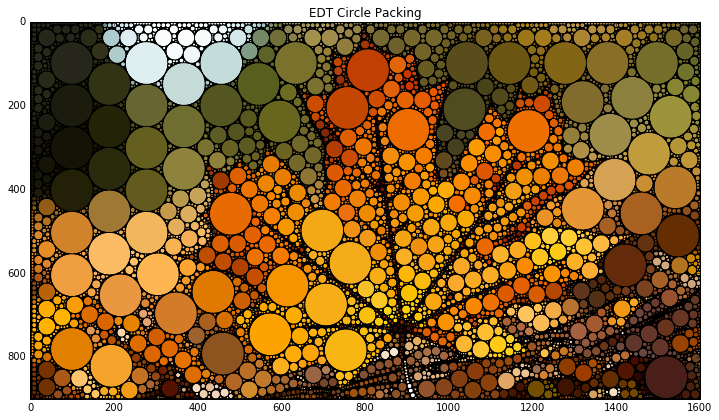

In [14]:
result = cv2.imread('out7.png')
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,12))
plt.imshow(result)
plt.title('EDT Circle Packing')
plt.show()

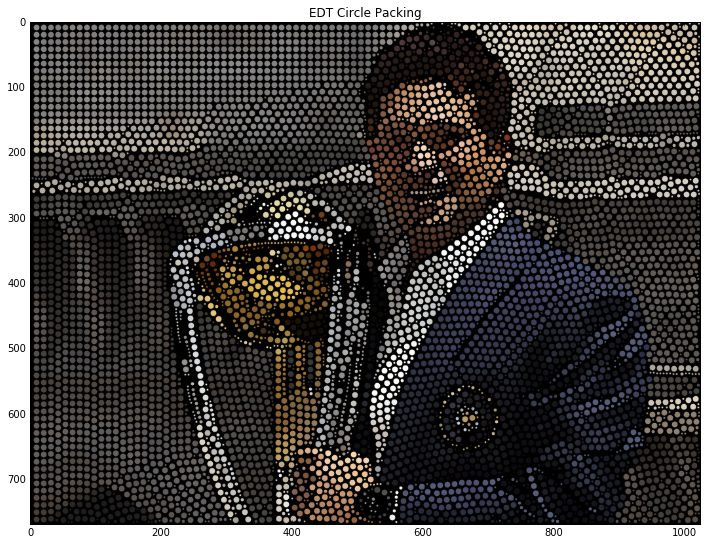

In [219]:
result = cv2.imread('out6.png')
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,12))
plt.imshow(result)
plt.title('EDT Circle Packing')
plt.show()

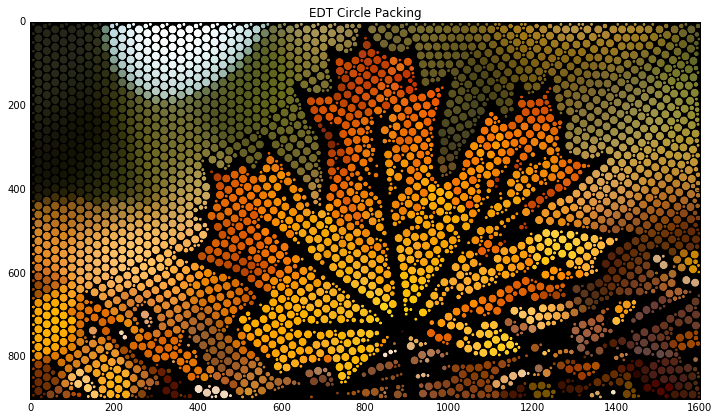

In [197]:
result = cv2.imread('out5.png')
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,12))
plt.imshow(result)
plt.title('EDT Circle Packing')
plt.show()